In [284]:
import pandas as pd
import quandl, pickle
import math

df= quandl.get("WIKI/GOOGL")
print(df.head())

              Open    High     Low    Close      Volume  Ex-Dividend  \
Date                                                                   
2004-08-19  100.01  104.06   95.96  100.335  44659000.0          0.0   
2004-08-20  101.01  109.08  100.50  108.310  22834300.0          0.0   
2004-08-23  110.76  113.48  109.05  109.400  18256100.0          0.0   
2004-08-24  111.24  111.60  103.57  104.870  15247300.0          0.0   
2004-08-25  104.76  108.00  103.88  106.000   9188600.0          0.0   

            Split Ratio  Adj. Open  Adj. High   Adj. Low  Adj. Close  \
Date                                                                   
2004-08-19          1.0  50.159839  52.191109  48.128568   50.322842   
2004-08-20          1.0  50.661387  54.708881  50.405597   54.322689   
2004-08-23          1.0  55.551482  56.915693  54.693835   54.869377   
2004-08-24          1.0  55.792225  55.972783  51.945350   52.597363   
2004-08-25          1.0  52.542193  54.167209  52.100830   53.1

In [285]:
df['HL_PRC']=((df['Adj. High'] - df['Adj. Low'])/df['Adj. Low'])*100
df['PRC_Change']=((df['Adj. Close'] - df['Adj. Open'])/df['Adj. Open'])*100

In [286]:
df=df[['Adj. Close', 'HL_PRC', 'PRC_Change', "Adj. Volume"]]

In [287]:
print(df.head())

            Adj. Close    HL_PRC  PRC_Change  Adj. Volume
Date                                                     
2004-08-19   50.322842  8.441017    0.324968   44659000.0
2004-08-20   54.322689  8.537313    7.227007   22834300.0
2004-08-23   54.869377  4.062357   -1.227880   18256100.0
2004-08-24   52.597363  7.753210   -5.726357   15247300.0
2004-08-25   53.164113  3.966115    1.183658    9188600.0


In [288]:
print(len(df))

3424


In [289]:
forecast_out= int(math.ceil(len(df)*0.01))
print(forecast_out)

35


In [290]:
df.fillna(-99999, inplace=True)
df['label']= df['Adj. Close'].shift(-forecast_out)

In [291]:
print (df.head())

            Adj. Close    HL_PRC  PRC_Change  Adj. Volume      label
Date                                                                
2004-08-19   50.322842  8.441017    0.324968   44659000.0  69.078238
2004-08-20   54.322689  8.537313    7.227007   22834300.0  67.839414
2004-08-23   54.869377  4.062357   -1.227880   18256100.0  68.912727
2004-08-24   52.597363  7.753210   -5.726357   15247300.0  70.668146
2004-08-25   53.164113  3.966115    1.183658    9188600.0  71.219849


In [292]:
print(df.tail())

            Adj. Close    HL_PRC  PRC_Change  Adj. Volume  label
Date                                                            
2018-03-21     1094.00  1.976619    0.130884    1990515.0    NaN
2018-03-22     1053.15  3.265882   -2.487014    3418154.0    NaN
2018-03-23     1026.55  4.089299   -2.360729    2413517.0    NaN
2018-03-26     1054.09  4.818025    0.332191    3272409.0    NaN
2018-03-27     1006.94  6.707965   -5.353887    2940957.0    NaN


In [293]:
Xlately=X[(-forecast_out):]
X=X[:(-forecast_out)]

df.dropna(inplace=True)

In [294]:
print(df.tail())

            Adj. Close    HL_PRC  PRC_Change  Adj. Volume    label
Date                                                              
2018-01-30     1177.37  1.142604   -0.029718    1792602.0  1094.00
2018-01-31     1182.22  1.213207   -0.134312    1643877.0  1053.15
2018-02-01     1181.59  1.547000    0.476195    2774967.0  1026.55
2018-02-02     1119.20  1.811604   -0.729098    5798880.0  1054.09
2018-02-05     1068.76  5.512236   -2.893850    3742469.0  1006.94


In [295]:
import numpy as np
from sklearn import preprocessing, svm

In [296]:
from sklearn.linear_model import LinearRegression

In [297]:
from sklearn.model_selection import train_test_split

In [298]:
X= np.array(df.drop(['label'], 1))
y= np.array(df['label'])

In [299]:
X = preprocessing.scale(X)

Xtrain, Xtest, ytrain, ytest= train_test_split(X, y, test_size=0.005)

In [300]:
clf= LinearRegression()

In [301]:
clf.fit(Xtrain, ytrain)
with open('linearregression.pickle','wb') as f:
    pickle.dump(clf, f)
    
pickle_in= open('linearregression.pickle', 'rb')
clf= pickle.load(pickle_in)
accuracy= clf.score(Xtest, ytest)
print(accuracy)

0.9890245346387532


In [303]:
forecast_set=clf.predict(Xlately)
print(forecast_set)

ValueError: shapes (35,5) and (4,) not aligned: 5 (dim 1) != 4 (dim 0)

In [266]:
import datetime
df['Forecast']=  np.nan
lastdate=df.iloc[-1].name
lastunix=lastdate.timestamp()
nextunix= lastunix + 86400

for i in forecast_set:
    nextdate= datetime.datetime.fromtimestamp(nextunix)
    nextunix+=86400
    df.loc[nextdate]= [np.nan for _ in range(len(df.columns)-1)] + [i]

print(df.tail())

                     Adj. Close  HL_PRC  PRC_Change  Adj. Volume  label  \
Date                                                                      
2018-03-08 05:30:00         NaN     NaN         NaN          NaN    NaN   
2018-03-09 05:30:00         NaN     NaN         NaN          NaN    NaN   
2018-03-10 05:30:00         NaN     NaN         NaN          NaN    NaN   
2018-03-11 05:30:00         NaN     NaN         NaN          NaN    NaN   
2018-03-12 05:30:00         NaN     NaN         NaN          NaN    NaN   

                        Forecast  
Date                              
2018-03-08 05:30:00  1152.071838  
2018-03-09 05:30:00  1157.514556  
2018-03-10 05:30:00  1128.740764  
2018-03-11 05:30:00  1141.018529  
2018-03-12 05:30:00  1141.765740  


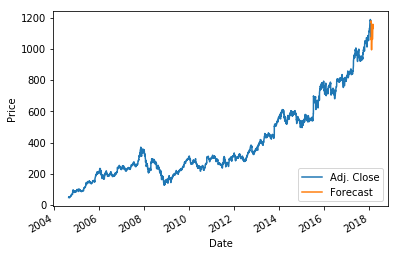

In [267]:
import  matplotlib.pyplot as plt
from matplotlib import style

#style.use['ggplot']

df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

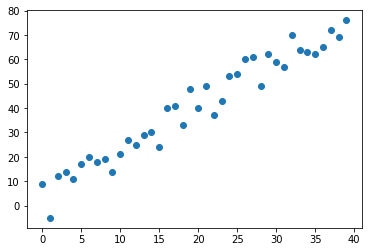

In [235]:
from statistics import mean

import random
def create_dataset(hm, variance, step=2, correlation=False):
    val=1
    ys= []
    for i in range(hm):
        y = val + random.randrange(-variance, variance)
        ys.append(y)
        if correlation and correlation =='pos':
            val+=step
        if correlation and correlation =='neg':
            val-=step
    xs= [i for i in range(len(ys))]
    return np.array(xs, dtype= np.float64), np.array(ys, dtype= np.float64)

#xs=np.array([1, 2, 3, 4, 5, 6], dtype=np.float64)
#ys=np.array([5, 4, 6, 5, 6, 7], dtype=np.float64)
xs, ys= create_dataset(40, 10, 2, correlation='pos')

plt.scatter(xs, ys)
plt.show()

In [236]:
def best_fit_slope(xs, ys):
    m= ( (mean(xs) * mean(ys)) - (mean(xs * ys)))/ (((mean(xs))*(mean(xs)))-mean(xs*xs))
    return m

In [237]:
m= best_fit_slope(xs, ys)
print (m)

1.7840525328330217


In [238]:
def best_fit_intercept(xs, ys, m):
    b= mean(ys) - m*(mean(xs))

    return b

b= best_fit_intercept(xs, ys, m)
print(b, m)

5.510975609756073 1.7840525328330217


In [239]:
regression_line= [(m*x)+b for x in xs]
predictx= 8
predicty= (m*predictx) + b

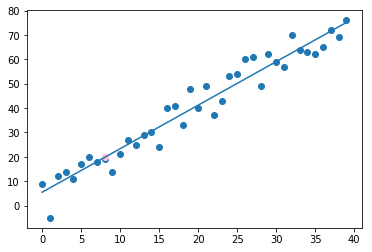

In [240]:
plt.scatter(xs, ys)
plt.scatter(predictx, predicty, color='pink')
plt.plot(xs, regression_line)
plt.show()

In [241]:
def squared_error(ys, regression_line):
    return sum(((regression_line)-(ys))**2)
def coefficient(ys, regression_line):
    y_mean_line= [mean(ys) for y in ys ]
    y_hat_squared= squared_error(ys, regression_line)
    y_mean_squared= squared_error(ys, y_mean_line)
    return (1-(y_hat_squared/y_mean_squared))

In [242]:
square_r= coefficient(ys, regression_line)

In [243]:
print(square_r)

0.9448689755552507
